In [1]:
import numpy as np
import random
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [28]:
import pandas as pd

In [2]:
train_labels=[]
train_samples=[]

In [3]:
for i in range(50):
  # The 5% of younger individuals who did experience side effects 
  random_younger = random.randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)
  # The 5% of older individual who didnot experience side effects
  random_older = random.randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  # The 95% of younger individuals who didnot experience side effects
  random_younger = random.randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)
  # The 95% of older individuals who did experience side effects
  random_older = random.randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)

In [ ]:
for i in train_labels:
  print(i)

In [5]:
train_labels=np.array(train_labels)
train_samples=np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [24]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1)) 

# Basically this a one dimensionall array, we changing it's shape so that it is convinient to fit to the sacler 

In [7]:
scaled_train_samples

array([[0.02298851],
       [0.14942529],
       [0.20689655],
       ...,
       [0.6091954 ],
       [0.59770115],
       [0.86206897]])

# **Simple TF Sequential Model**

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [17]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                32        
                                                                 
 dense_6 (Dense)             (None, 32)                544       
                                                                 
 dense_7 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(x=scaled_train_samples, y=train_labels,validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.5837 - accuracy: 0.7974 - val_loss: 0.3920 - val_accuracy: 0.9095 - 1s/epoch - 6ms/step
Epoch 2/30
189/189 - 0s - loss: 0.3291 - accuracy: 0.9185 - val_loss: 0.2189 - val_accuracy: 0.9571 - 383ms/epoch - 2ms/step
Epoch 3/30
189/189 - 0s - loss: 0.2642 - accuracy: 0.9344 - val_loss: 0.1899 - val_accuracy: 0.9714 - 375ms/epoch - 2ms/step
Epoch 4/30
189/189 - 0s - loss: 0.2526 - accuracy: 0.9333 - val_loss: 0.1835 - val_accuracy: 0.9714 - 381ms/epoch - 2ms/step
Epoch 5/30
189/189 - 0s - loss: 0.2481 - accuracy: 0.9344 - val_loss: 0.1696 - val_accuracy: 0.9571 - 335ms/epoch - 2ms/step
Epoch 6/30
189/189 - 0s - loss: 0.2427 - accuracy: 0.9413 - val_loss: 0.1670 - val_accuracy: 0.9524 - 362ms/epoch - 2ms/step
Epoch 7/30
189/189 - 1s - loss: 0.2392 - accuracy: 0.9365 - val_loss: 0.1731 - val_accuracy: 0.9714 - 554ms/epoch - 3ms/step
Epoch 8/30
189/189 - 1s - loss: 0.2383 - accuracy: 0.9397 - val_loss: 0.1591 - val_accuracy: 0.9571 - 563ms/epoch - 3ms/step
Epo

# **Predict**

In [52]:
test_samples=[]
test_labels=[]

In [55]:
for i in range(10):
  # The 5% of younger individuals who did experience side effects 
  random_younger = random.randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)
  # The 5% of older individual who didnot experience side effects
  random_older = random.randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(200):
  # The 95% of younger individuals who didnot experience side effects
  random_younger = random.randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)
  # The 95% of older individuals who did experience side effects
  random_older = random.randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)

In [56]:
test_labels=np.array(test_labels)
test_samples=np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [57]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1)) 


In [58]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [59]:
pd.DataFrame(predictions)

,0,1
0,0.967171,0.032829
1,0.057179,0.942821
2,0.967651,0.032349
3,0.967412,0.032588
4,0.080687,0.919313
...,...,...
415,0.414380,0.585620
416,0.024118,0.975882
417,0.025392,0.974608
418,0.965690,0.034310


In [60]:
rounded_predictions= np.argmax(predictions, axis=1)

In [61]:
rounded_predictions[:100]

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0])

In [62]:
test_labels[:100]

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0])

### Confusion Matrix

In [63]:
%matplotlib inline
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [64]:
def nikhil_plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    
    if normalize:
        cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Confusion Matrix with Normalization')
    else:
        print('Confusion Matrix without Normalization')


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [65]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

Confusion Matrix without Normalization


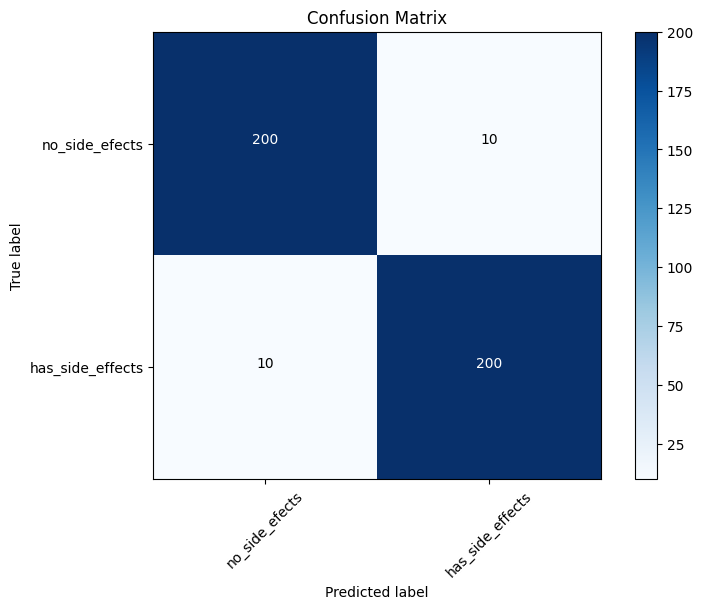

In [66]:
cm_plot_labels = ['no_side_efects', 'has_side_effects']
nikhil_plot_confusion_matrix(cm=cm, target_names = cm_plot_labels, title='Confusion Matrix')

# **Save a model**

In [67]:
import os.path

In [68]:
if os.path.isfile('models/medical_trial_model.h5') is False:
  model.save('models/medical_trial_model.h5')

In [69]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [71]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                32        
                                                                 
 dense_6 (Dense)             (None, 32)                544       
                                                                 
 dense_7 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## **Model to Json**

In [72]:
json_string=  model.to_json()

In [73]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_5_input"}}, {"class_name": "Dense", "config": {"name": "dense_5", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 1], "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_6", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "

In [74]:
from tensorflow.keras.models import model_from_json
model_arch = model_from_json(json_string)

In [75]:
model_arch.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                32        
                                                                 
 dense_6 (Dense)             (None, 32)                544       
                                                                 
 dense_7 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
